For imbalanced dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from collections import Counter
from sklearn.datasets import make_classification

In [5]:
X,y=make_classification(n_samples=10000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=42)

In [6]:
X

array([[ 0.20476032, -0.35766544],
       [-1.38119698,  1.39004105],
       [ 0.55620276, -0.69167191],
       ...,
       [-0.38308762,  0.10109103],
       [-0.99091527,  0.76611131],
       [ 0.21029584, -0.09065576]])

In [12]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
Counter(y)

Counter({np.int64(0): 9859, np.int64(1): 141})

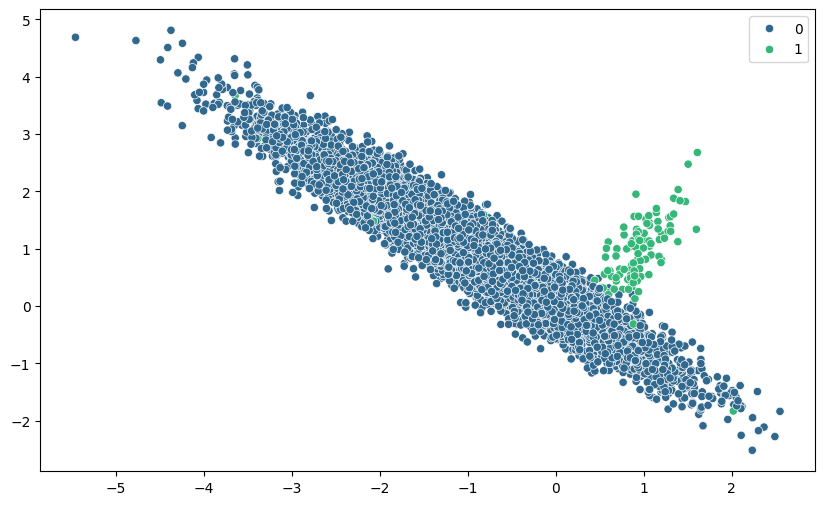

In [13]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis')

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Hyperparameter Tuning

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[0.1,1,2.5,2.5,100]
solver=["lbfgs",'liblinear','newton-cg','newton-cholesky','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [16]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [17]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [18]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv=StratifiedKFold()

In [19]:
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
#cv for cross validation

In [20]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 2.5, 2.5, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [21]:
grid.fit(X_train,y_train)

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4000 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\acer\Desktop\Machine_learning\env\Lib\site-

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 2.5, 2.5, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [22]:
grid.best_params_

{'C': 0.1,
 'class_weight': {0: 1, 1: 10},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [23]:
grid.best_score_

np.float64(0.9953333333333333)

In [24]:
y_pred=grid.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.994
[[2456    1]
 [  14   29]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2457
           1       0.97      0.67      0.79        43

    accuracy                           0.99      2500
   macro avg       0.98      0.84      0.90      2500
weighted avg       0.99      0.99      0.99      2500

